Libraries needed for our **MDP Cooking Chef Problem**

In [ ]:
import numpy as np  # For handling arrays and matrix operations
import random  # For generating random numbers, crucial in stochastic processes

import matplotlib.pyplot as plt  # For plotting and visualizations

import math  # For mathematical functions

import pandas as pd  # For handling data in a tabular format


**Define the Walls,Tools,Goal_states and Gates:** Translate walls,tools,goals and gates constraints into a format that can be used in the code. Since walls are bidirectional, each pair should be represented twice.

In [ ]:
class CookingChefMDP:
    def __init__(self):
        self.grid = np.array([
            ['E', '.', '.', '.', '.', '.', '.', 'E', '.'],
            ['T', '.', 'A', '.', '.', '.', '.', 'T', 'G'],
            ['.', '.', 'G', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.', '.']
        ])
        # Define walls
        self.walls = [
            # Horizontal wall
            ((0, 2), (0, 3)), ((0, 3), (0, 2)),
            ((0, 6), (0, 7)), ((0, 7), (0, 6)),
            ((1, 1), (1, 2)), ((1, 2), (1, 1)),
            ((1, 6), (1, 7)), ((1, 7), (1, 6)),
            ((2, 1), (2, 2)), ((2, 2), (2, 1)),
            ((2, 6), (2, 7)), ((2, 7), (2, 6)),
            ((3, 0), (3, 1)), ((3, 1), (3, 0)),
            ((3, 6), (3, 7)), ((3, 7), (3, 6)),
            # Vertical walls
            ((0, 3), (1, 3)), ((1, 3), (0, 3)),
            ((1, 1), (2, 1)), ((2, 1), (1, 1)),
            ((2, 2), (3, 2)), ((3, 2), (2, 2)),
            ((0, 7), (1, 7)), ((1, 7), (0, 7)),
            ((1, 7), (2, 7)), ((2, 7), (1, 7)),
            ((2, 7), (3, 7)), ((3, 7), (2, 7)),
            ]

        # Define goal states (frying pan and oven)
        self.goal_states = [(0, 0), (0, 7)]

        # Define tool locations (egg beaters)
        self.tool_locations = [(1, 0), (1, 7)]

        # Define gates (special cells for teleportation)
        self.gates = {(2, 2): (1, 8), (1, 8): (2, 2)}

        # Initialize states
        self.states = [(x, y) for x in range(self.grid.shape[0]) for y in range(self.grid.shape[1])]

        # Define possible actions
        self.actions = ['up', 'down', 'left', 'right', 'use_gate']

        # Initialize Q-table
        self.Q = {(state, action): 0 for state in self.states for action in self.actions}



**get_initial_state**: This method randomly selects an initial state from the list of all states at the beginning of each episode.

**run_episodes**: This method runs the MDP for a specified number of episodes. It uses the choose_action, calculate_next_state, get_reward, update_q_value, and check_if_done methods to simulate each step within an episode.

**visualize_policy**: This method creates a grid visualization of the optimal policy learned by the MDP. It uses matplotlib to plot this grid, where each cell represents the best action for that state.

**Logging**: The code includes print statements to log the progress of each episode and the actions taken at each step.

In [ ]:
def get_initial_state(self):
        # Choose a random initial state
        initial_state = random.choice(self.states)
        # Place the agent '☺' in the chosen initial state
        self.place_agent_on_grid(initial_state)
        return initial_state
CookingChefMDP.get_initial_state = get_initial_state

def place_agent_on_grid(self, state):
        # Reset grid to remove previous agent position
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                if self.grid[i, j] == '☺':
                    self.grid[i, j] = '.'

        # Place the agent '☺' in the new state
        x, y = state
        self.grid[x, y] = '☺'
CookingChefMDP.place_agent_on_grid = place_agent_on_grid

def run_episodes(self, num_episodes, alpha, gamma, epsilon):
    for episode in range(num_episodes):
      state = self.get_initial_state()
      self.visualize_policy(agent_start_state=state)
      done = False

      while not done:
            action = self.choose_action(state, epsilon)
            next_state = self.calculate_next_state(state, action)
            reward = self.get_reward(state, action, next_state)
            self.update_q_value(state, action, reward, next_state, alpha, gamma)

                # Print the result of the current step
            print(f"Episode {episode}, State: {state}, Action: {action}, Reward: {reward}")

            state = next_state
            done = self.check_if_done(state)

            # Print the result of the episode
            print(f"Episode {episode} finished")

        # After all episodes, visualize the policy
      self.visualize_policy()
CookingChefMDP.run_episodes = run_episodes

def visualize_policy(self, agent_start_state=None):
    fig, ax = plt.subplots(figsize=(self.grid.shape[1], self.grid.shape[0]))

    # Set up the plot grid
    ax.set_xlim(-0.5, self.grid.shape[1] - 0.5)
    ax.set_ylim(-0.5, self.grid.shape[0] - 0.5)
    ax.set_xticks(np.arange(self.grid.shape[1]) - 0.5)
    ax.set_yticks(np.arange(self.grid.shape[0]) - 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='black', linestyle='-', linewidth=2)

    # Arrow properties
    arrow_properties = {
        'up': {'dx': 0, 'dy': -0.3, 'head_width': 0.1, 'head_length': 0.1},
        'down': {'dx': 0, 'dy': 0.3, 'head_width': 0.1, 'head_length': 0.1},
        'left': {'dx': -0.3, 'dy': 0, 'head_width': 0.1, 'head_length': 0.1},
        'right': {'dx': 0.3, 'dy': 0, 'head_width': 0.1, 'head_length': 0.1},
    }

    # Draw the optimal actions as arrows
    for state in self.states:
        if state in self.goal_states:
            # Draw final goal states with 'F'
            ax.text(state[1], state[0], 'F', fontsize=18, va='center', ha='center')
        elif state in self.tool_locations:
            # Draw tool locations with 'T'
            ax.text(state[1], state[0], '⚒', fontsize=18, va='center', ha='center')
        elif agent_start_state and state == agent_start_state:
            # Draw agent start position with ☺
            ax.text(state[1], state[0], '☺', fontsize=18, va='center', ha='center')
        elif state in self.gates.keys():
            # Draw gate locations with a 'G'
            ax.text(state[1], state[0], 'G', fontsize=18, va='center', ha='center')



        best_action = max(self.actions, key=lambda a: self.Q[(state, a)])

        if best_action in arrow_properties:
            # Draw an arrow for the action
            props = arrow_properties[best_action]
            ax.arrow(state[1], state[0], props['dx'], props['dy'], head_width=props['head_width'], head_length=props['head_length'], fc='k', ec='k')
        elif best_action == 'use_gate' and state in self.gates:
            # Draw the gate symbol only for states that are gates
            gate_pair = self.gates[state]
            circle = plt.Circle((state[1], state[0]), 0.2, color='blue', fill=False)
            ax.add_patch(circle)
            circle_connected = plt.Circle((gate_pair[1], gate_pair[0]), 0.2, color='blue', fill=False)
            ax.add_patch(circle_connected)
            # Draw a dashed line to represent the teleportation between gates
            plt.plot([state[1], gate_pair[1]], [state[0], gate_pair[0]], 'b--', linewidth=1)

    plt.gca().invert_yaxis()  # Invert y-axis to have the origin at the top-left
    plt.show()

CookingChefMDP.visualize_policy = visualize_policy



**Implementation calculate_next_state Function:** This function will compute the next state based on the current state and action.

**Implementation is_valid_action Function:** Using the walls definition and calculate_next_state, this function will determine if an action is valid.

Test is_valid_action with various states and actions to ensure it correctly identifies valid and invalid moves.

In [ ]:
def calculate_next_state(self, state, action):
        # Define how the state changes
        # for each action The calculate_next_state function calculates the next state based on the current state and action.
        x, y = state
        new_state = state  # Initialize new_state to current state

        if action == 'up':
            new_state = (x - 1, y)
        elif action == 'down':
            new_state = (x + 1, y)
        elif action == 'left':
            new_state = (x, y - 1)
        elif action == 'right':
            new_state = (x, y + 1)
        elif action == 'use_gate':
            if state in self.gates:
                return self.gates[state]
        # Check if new_state is within the grid boundaries
        if 0 <= new_state[0] < self.grid.shape[0] and 0 <= new_state[1] < self.grid.shape[1]:
            return new_state
        else:
            return state  # Return the current state if new_state is out of bounds
CookingChefMDP.calculate_next_state = calculate_next_state

def is_valid_action(self, state, action):
        # Calculate the next state based on the current state and action
        next_state = self.calculate_next_state(state, action)

        # Check if the next state is within grid boundaries
        if not (0 <= next_state[0] < len(self.grid) and 0 <= next_state[1] < len(self.grid[0])):
            return False

        # Check if moving from the current state to the next state is blocked by a wall
        if (state, next_state) in self.walls or (next_state, state) in self.walls:
            return False

        return True
CookingChefMDP.is_valid_action = is_valid_action

The **get_reward function** will determine the reward for a given action taken in a specific state. In the context of our Cooking Chef problem, we will assign positive rewards for reaching tools or goals and negative rewards for hitting walls or taking inefficient paths.

In [ ]:
def get_reward(self, state, action, next_state):
    # Assign rewards based on the problem context
    if next_state == self.goal_states:
        return 10  # Reward for reaching the goal
    elif next_state in self.tool_locations:
        return 5  # Reward for reaching a tool
    elif action == 'use_gate':
        return 2  # Reward for using the gate
    elif next_state in self.walls:
        return -5  # Penalty for hitting a wall
    return -1  # Small penalty for each move to encourage efficiency
CookingChefMDP.get_reward = get_reward


The **choose_action** function selects an action based on our policy which is epsilon-greedy policy , balancing exploration and exploitation.

In [ ]:
def choose_action(self, state, epsilon=0.1):
    if np.random.rand() < epsilon:
        # Exploration: choose a random action
        return np.random.choice(self.actions)
    else:
        # Exploitation: choose the best action based on current Q-values
        q_values = [self.Q[(state, a)] for a in self.actions]
        return self.actions[np.argmax(q_values)]
CookingChefMDP.choose_action = choose_action

The **update_q_value** function updates the Q-value for a given state-action pair based on the Bellman equation.

In [ ]:
def update_q_value(self, state, action, reward, next_state, alpha, gamma):
    valid_actions = [a for a in self.actions if self.is_valid_action(next_state, a)]
    max_next_q = max(self.Q.get((next_state, a), 0) for a in valid_actions)
    self.Q[(state, action)] += alpha * (reward + gamma * max_next_q - self.Q.get((state, action), 0))
CookingChefMDP.update_q_value = update_q_value


The **check_if_done** function checks if the goal state is reached, ending the episode.

In [ ]:
def check_if_done(self, state):
    return state in self.goal_states  # Assuming goal_states is defined
CookingChefMDP.check_if_done = check_if_done

To complete our **model** and run it, we create an instance of the **CookingChefMDP** class and call the run_episodes method.
This is the part of the code that actually puts our MDP model into action and allows it to *learn* and *optimize* the **policy** based on the specified number of **episodes**.

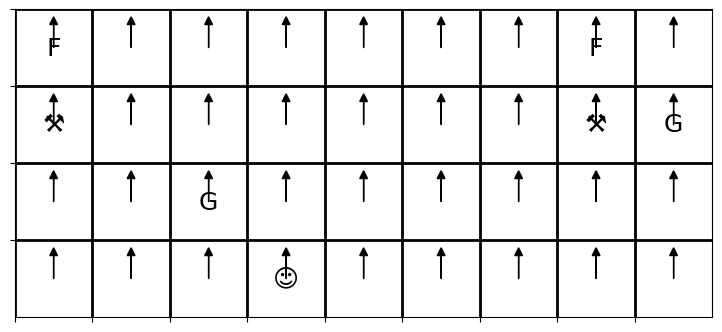

Episode 0, State: (3, 3), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (2, 3), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (1, 3), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (0, 3), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (0, 3), Action: right, Reward: -1
Episode 0 finished
Episode 0, State: (0, 4), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (0, 4), Action: down, Reward: -1
Episode 0 finished
Episode 0, State: (1, 4), Action: up, Reward: -1
Episode 0 finished
Episode 0, State: (0, 4), Action: left, Reward: -1
Episode 0 finished
Episode 0, State: (0, 3), Action: down, Reward: -1
Episode 0 finished
Episode 0, State: (1, 3), Action: down, Reward: -1
Episode 0 finished
Episode 0, State: (2, 3), Action: down, Reward: -1
Episode 0 finished
Episode 0, State: (3, 3), Action: down, Reward: -1
Episode 0 finished
Episode 0, State: (3, 3), Action: left, Reward: -1
Episode 0 finished
Episode 0, State: (3, 2), Actio

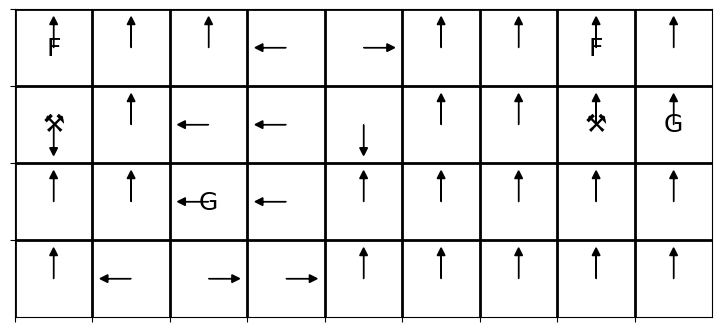

In [ ]:
# Create an instance of our MDP model
mdp_model = CookingChefMDP()

# Parameters for the MDP run
num_episodes = 1  # Number of episodes to run
alpha = 0.1          # Learning rate
gamma = 0.9          # Discount factor
epsilon = 0.1        # Epsilon for the epsilon-greedy policy

# Run the MDP model
mdp_model.run_episodes(num_episodes, alpha, gamma, epsilon)
